In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas
from geodatasets import get_path
import matplotlib.pyplot as plt

In [81]:
# Loading the file
cdr = pd.read_excel('data/Sample CDR.xlsx')
cdr = cdr.iloc[11:]

In [82]:
# Renaming the columns
new_names = {'Information Provided To:': 'Date',
             'Unnamed: 1': 'DateTime', 
             'Unnamed: 2': 'Duration', 
             'Unnamed: 3': 'CallType', 
             'Unnamed: 4': 'Direction',
             'Unnamed: 5': 'CallingNumber', 
             'Unnamed: 6': 'CalledNumber', 
             'Unnamed: 7': 'CompletionCode',
             'Unnamed: 8': '1stLTESiteID',
             'Unnamed: 9': '1stLTESectorID',
             'Unnamed: 10': '1stLAC',
             'Unnamed: 11': '1stCellID',
             'Unnamed: 12': '1stTowerAzimuth',
             'Unnamed: 13': '1stTowerLAT', 
             'Unnamed: 14': '1stTowerLONG', 
             'Unnamed: 15': '1stTowerAddress', 
             'Unnamed: 16': '1stTowerCity',
             'Unnamed: 17': '1stTowerState',
             'Unnamed: 18': '1stTowerZip'}
cdr.rename(new_names, axis=1, inplace=True)

In [90]:
# CDR
print(f'CDR shape: {cdr.shape}')
cdr['DateTime'] = pd.to_datetime(cdr['DateTime'])
cdr['Day'] = cdr['DateTime'].dt.day
cdr['Hour'] = cdr['DateTime'].dt.hour
cdr['AP'] = cdr['Hour'].apply(lambda x: 'AM' if x < 12 else 'PM')
cdr['CallingNumber'] = cdr['CallingNumber'].astype('category')
cdr['CalledNumber'] = cdr['CalledNumber'].astype('category')
cdr['Direction'] = cdr['Direction'].astype('category')
cdr['Day'] = cdr['Day'].astype('category')
cdr['Hour'] = cdr['Hour'].astype('category')
cdr['AP'] = cdr['Hour'].astype('category')
print(f'\nCDR info: \n{cdr.info()}')

CDR shape: (352, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 11 to 362
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Information Provided To:   352 non-null    object        
 1   DateTime                   352 non-null    datetime64[ns]
 2   Duration                   215 non-null    object        
 3   CallType                   352 non-null    object        
 4   Direction                  260 non-null    category      
 5   CallingNumber              352 non-null    category      
 6   CalledNumber               352 non-null    category      
 7   CompletionCode             352 non-null    object        
 8   1stLTESiteID               239 non-null    object        
 9   1stLTESectorID             239 non-null    object        
 10  1stLAC                     17 non-null     object        
 11  1stCellID                  17 non-null     object

In [91]:
print(cdr.isna().sum())

Information Provided To:       0
DateTime                       0
Duration                     137
CallType                       0
Direction                     92
CallingNumber                  0
CalledNumber                   0
CompletionCode                 0
1stLTESiteID                 113
1stLTESectorID               113
1stLAC                       335
1stCellID                    335
1stTowerAzimuth              352
1stTowerLAT                  125
1stTowerLONG                 125
1stTowerAddress              125
1stTowerCity                 125
1stTowerState                125
1stTowerZip                  125
Day                            0
Hour                           0
AP                             0
dtype: int64


In [92]:
call_activity = cdr.groupby(['Day', 'Hour', 'Direction'])[['Duration']].agg(['count', 'sum'])
# print(call_activity.iloc[:, 1])

# What is the call duration per hour per direction?
nz_call_activity = call_activity[call_activity.iloc[:, 0] != 0]
print(nz_call_activity)

# What is the call duration per day per direction?
duration = cdr.groupby(['Direction', 'Day'])['Duration'].agg(['sum'])
print(duration)

# What is the call duration per direction per AM/PM?
ampm = cdr.groupby(['Direction', 'AP'])['Duration'].agg(['sum'])
print(ampm)

# What are the phone numbers with more activity?
phones = cdr.groupby(['Direction', 'CallingNumber', 'CalledNumber'])['Duration'].agg('sum')
print(phones)
# call_activity = call_activity.unstack(level='Direction')
# call_activity
# call_activity.head()
# call_activity.index.to_list()
# call_activity.info()
# summary_call = call_activity[call_activity.iloc[:,1] != 0].iloc[:, [1, 3]]

                   Duration      
                      count   sum
Day Hour Direction               
27  1    Incoming         1     4
         Outgoing         1     4
    11   Outgoing         1    86
    12   Incoming         2   884
    14   Incoming         1   988
    15   Incoming         1    69
         Outgoing         1   420
    17   Incoming         1  2071
    18   Incoming         1     4
         Outgoing         2    61
    19   Outgoing         2   198
    21   Incoming         1    95
    22   Incoming         1    84
         Outgoing         1  1068
28  0    Incoming         1     5
    1    Incoming         1    29
         Outgoing         4   409
    4    Outgoing         2    20
    5    Outgoing         2   634
    6    Incoming        10  1391
         Outgoing        23  1267
    7    Incoming         2  2672
         Outgoing         9   202
    8    Incoming         6   209
         Outgoing         7   195
    10   Incoming         2   490
         Outgo

/var/folders/l8/bs7tpptx1bn6tj17hnvl3y2m0000gn/T/ipykernel_29818/3636151959.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  call_activity = cdr.groupby(['Day', 'Hour', 'Direction'])[['Duration']].agg(['count', 'sum'])
/var/folders/l8/bs7tpptx1bn6tj17hnvl3y2m0000gn/T/ipykernel_29818/3636151959.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration = cdr.groupby(['Direction', 'Day'])['Duration'].agg(['sum'])
/var/folders/l8/bs7tpptx1bn6tj17hnvl3y2m0000gn/T/ipykernel_29818/3636151959.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pan

In [86]:
# print(phones.index)
phones.sort_values(ascending=False)

Direction  CallingNumber  CalledNumber
Outgoing   16504838989    14158887755     8270
Incoming   16504838989    14157774455     5000
                          14153336161     3050
                          14151110505     2142
                          16505551212      732
                                          ... 
Outgoing   16504838989    14156565656        0
                          14156663322        0
                          14156969696        0
Incoming   16504838989    15102062062        0
Outgoing   16504838989    128                0
Name: Duration, Length: 100, dtype: object

In [87]:
io = cdr.groupby(['Direction', 'Day'])['Duration'].agg(['sum'])
print(io)
# io.loc[27, :]

                sum
Direction Day      
Incoming  27   4199
          28   8788
          29   2501
Outgoing  27   1837
          28   7027
          29     95


/var/folders/l8/bs7tpptx1bn6tj17hnvl3y2m0000gn/T/ipykernel_29818/2883469415.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  io = cdr.groupby(['Direction', 'Day'])['Duration'].agg(['sum'])


CategoricalIndex([27, 28, 29], categories=[27, 28, 29], ordered=False, dtype='category', name='Day')


(array([0, 1, 2]), [Text(0, 0, '27'), Text(1, 0, '28'), Text(2, 0, '29')])

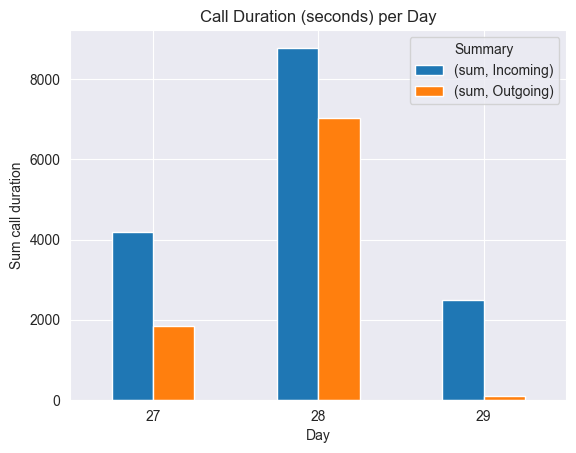

In [89]:
iou = io.unstack(level=0)
print(iou.index)
# print(iou.columns)
iou.plot(kind='bar', ylabel='Sum call duration', title='Call Duration (seconds) per Day', legend=True)
plt.legend(title='Summary')
plt.xticks(rotation=0)

In [101]:
# location = cdr.groupby(['1stTowerAddress'])['DateTime'].agg(['count'])
location = cdr.groupby(['Day', 'Hour', '1stTowerAddress', '1stTowerCity'])['DateTime'].agg(['count'])
nz_location = location[location.iloc[:, 0] != 0]
print(nz_location)
nz_location.to_csv('location_summary.csv')

                                            count
Day Hour 1stTowerAddress     1stTowerCity        
27  1    3067 Turk Blvd      San Francisco      2
    2    3067 Turk Blvd      San Francisco      1
    11   3067 Turk Blvd      San Francisco      1
    12   1358 S Van Ness Ave San Francisco      3
         665 Capp St         San Francisco      1
    14   1358 S Van Ness Ave San Francisco      2
    15   1358 S Van Ness Ave San Francisco      2
    17   1358 S Van Ness Ave San Francisco      1
    18   900 Corbett Ave     San Francisco      3
    19   900 Corbett Ave     San Francisco      2
    21   900 Corbett Ave     San Francisco      1
    22   900 Corbett Ave     San Francisco      1
28  0    1418 Shrader St     San Francisco      1
    1    1418 Shrader St     San Francisco      1
         2198 Fell St        San Francisco      1
         3067 Turk Blvd      San Francisco      2
    4    3067 Turk Blvd      San Francisco      5
    5    3067 Turk Blvd      San Francisco      3


/var/folders/l8/bs7tpptx1bn6tj17hnvl3y2m0000gn/T/ipykernel_29818/3555810618.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  location = cdr.groupby(['Day', 'Hour', '1stTowerAddress', '1stTowerCity'])['DateTime'].agg(['count'])
